# Customer Segmentation - Clustering

In this project, we aim to cluster customers based on their similarities in order to maximize the relevance of each cluster for the business. By doing so, the company can implement targeted marketing strategies more effectively and enhance customer satisfaction.

### Import Libraries

In [1]:
import pandas as pd
pd.set_option('display.max_columns',200)

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')  

### Read Data

In [2]:
df=pd.read_csv('PBL5recommendationdata.csv',encoding = "latin-1")

### EDA 

In [3]:
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.purchase_order,Orders.payment_id,Orders.payment_code,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.comments,Orders.notes,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.attributes,Order_Items.attribute_names,Order_Items.attribute_prices,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.registry_item,Order_Items.related_id,Order_Items.reorder_frequency,Order_Items.account_id,Order_Items.flags,Products.id,Products.status,Products.product_type,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.menu_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.right_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_mpn,Products.shopping_gender,Products.shopping_color,Products.shopping_age,Products.shopping_flags,Products.amazon_asin,Products.amazon_type,Products.amazon_item_type,Products.amazon_price,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.google_adwords,Products.shopping_cat,Products.shopping_type,Products.pricegrabber_cat,Products.shopzilla_cat,Products.thefind_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.short_description,Products.long_description,Products.websites,Products.video,Products.audio,Products.seo_title,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0.0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.20,0.0,9.95,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,64.29,NaN,6993607863,510142,NaN,1,1426019099,1.438868e+09,1.426101e+09,NaN,Insured By Eye4Fraud,NaN,NaN,NaN,NaN,NaN,NaN,0.0,528

In [4]:
df.shape

(4194, 181)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Columns: 181 entries, Customers.id to Products.freight_cost
dtypes: float64(98), int64(10), object(73)
memory usage: 5.8+ MB


In [6]:
pd.options.display.max_rows=181 

In [7]:
df.isnull().sum().sort_values(ascending=False) 

Products.freight_cost             4194
Orders.mailing                    4194
Orders.gift_message               4194
Orders.registry_id                4194
Products.right_flag               4194
Orders.sales_rep                  4194
Products.markup                   4194
Orders.payment_ref                4194
Products.websites                 4194
Orders.purchase_order             4194
Orders.gift_id                    4194
Orders.gift_amount                4194
Products.price_breaks             4194
Products.seo_footer               4194
Products.default_quantity         4194
Orders.shipping_flags             4194
Products.price_break_type         4194
Orders.shipping_trans             4194
Orders.website                    4194
Products.amazon_type              4194
Order_Items.account_id            4194
Order_Items.attributes            4194
Order_Items.attribute_prices      4194
Products.menu_name                4194
Order_Items.registry_item         4194
Order_Items.related_id   

In [8]:
threshold = 2800  
df = df.dropna(thresh=len(df) - threshold, axis=1)
#If the number of missing values in a column is less than a threshold value compared to the total number of rows in the dataset, then that column is excluded from the dataset.

In [9]:
df.isnull().sum().sort_values(ascending=False) 

Products.size                    2751
Products.shopping_color          2494
Products.latex                   2255
Products.hygienic                2114
Customers.mailing                2080
Products.upc                     2067
Products.thefind_cat             1873
Products.shopping_cat            1860
Products.shopzilla_cat           1860
Products.pricegrabber_cat        1860
Products.shopping_type           1860
Products.case_qty                1556
Products.import_flags            1408
Products.seo_category            1357
Products.packaging               1304
Products.override_markup         1274
Products.amazon_asin             1259
Products.taxable                 1235
Products.multiple                1230
Products.flags                   1207
Products.short_description       1179
Products.shopping_gtin           1064
Products.hcpcs                    906
Orders.payment_code               748
Orders.shipping_carrier           617
Products.display_name             532
Products.qui

▪ The first step for this project is to import the dataset and create three data
frames <br>
o Customer <br>
o Products <br>
o Orders

In [10]:
customer=df[['Customers.customer_type','Customers.create_date','Customers.last_modified','Customers.id']]

In [11]:
products=df[['Products.list_price','Products.price','Products.cost','Products.status']]

In [12]:
orders=df[['Orders.payment_date','Orders.payment_amount','Orders.payment_status','Orders.subtotal','Orders.total','Orders.status']]

In [13]:
df['Products.cost'].unique()

array([ 44.  ,   1.87,  52.5 , ...,  14.33,  14.57, 675.  ])

In [14]:
customer['Customers.customer_type'].fillna(customer['Customers.customer_type'].mode()[0],inplace=True)
orders['Orders.payment_date'].fillna(orders['Orders.payment_date'].mean(),inplace=True)
orders['Orders.payment_amount'].fillna(orders['Orders.payment_amount'].mean(),inplace=True)
orders['Orders.payment_status'].fillna(orders['Orders.payment_status'].mode()[0],inplace=True)
products['Products.list_price'].fillna(products['Products.list_price'].mean(),inplace=True)
products['Products.price'].fillna(products['Products.price'].mean(),inplace=True)
products['Products.cost'].fillna(products['Products.cost'].mean(),inplace=True)
products['Products.status'].fillna(products['Products.status'].mode()[0],inplace=True)

In [15]:
customer.isnull().sum()

Customers.customer_type    0
Customers.create_date      0
Customers.last_modified    0
Customers.id               0
dtype: int64

In [16]:
products.isnull().sum()

Products.list_price    0
Products.price         0
Products.cost          0
Products.status        0
dtype: int64

In [17]:
orders.isnull().sum()

Orders.payment_date      0
Orders.payment_amount    0
Orders.payment_status    0
Orders.subtotal          0
Orders.total             0
Orders.status            0
dtype: int64

▪ Insert the three data frames in a SQLite database

In [18]:
import sqlite3

In [19]:
df1=pd.DataFrame(customer)
conn = sqlite3.connect('customer.db')
df1.to_sql('customer', conn, if_exists='replace', index=False)
conn.close()

In [20]:
df1=pd.DataFrame(products)
conn = sqlite3.connect('products.db')
df1.to_sql('products', conn, if_exists='replace', index=False)
conn.close()

In [21]:
df1=pd.DataFrame(orders)
conn = sqlite3.connect('orders.db')
df1.to_sql('orders', conn, if_exists='replace', index=False)
conn.close()

▪ Import the tables from the database and merge them into a single data frame

In [22]:
conn=sqlite3.connect('customer.db') 
query='SELECT * FROM customer'
customer=pd.read_sql_query(query,conn)
conn.close()

In [23]:
customer.sample(3)

,Customers.customer_type,Customers.create_date,Customers.last_modified,Customers.id
1464,0.0,1435345092,1437763679,1214
1821,0.0,1441142278,1456954581,1518
1347,0.0,1432849004,1437559390,1097


In [24]:
conn=sqlite3.connect('products.db') 
query='SELECT * FROM products'
products=pd.read_sql_query(query,conn)
conn.close()

In [25]:
products.sample(3)

,Products.list_price,Products.price,Products.cost,Products.status
905,51.87,29.05,20.75,0.0
2054,86.10,74.41,55.95,3.0
138,36.37,27.17,18.74,0.0


In [26]:
conn=sqlite3.connect('orders.db') 
query='SELECT * FROM orders'
orders=pd.read_sql_query(query,conn)
conn.close()

In [27]:
orders.sample(3)

,Orders.payment_date,Orders.payment_amount,Orders.payment_status,Orders.subtotal,Orders.total,Orders.status
2796,1.454341e+09,31.82,3.0,21.87,31.82,1
697,1.420594e+09,136.64,3.0,133.36,136.64,1
3330,1.458240e+09,33.99,3.0,24.40,33.99,1


In [28]:
df2=pd.concat([customer,products,orders],axis=1)

In [29]:
df2.head()

,Customers.customer_type,Customers.create_date,Customers.last_modified,Customers.id,Products.list_price,Products.price,Products.cost,Products.status,Orders.payment_date,Orders.payment_amount,Orders.payment_status,Orders.subtotal,Orders.total,Orders.status
0,0.0,1426018724,1437764306,797,80.70,57.64,44.00,0.0,1.426019e+09,64.29,3.0,57.20,64.29,1
1,0.0,1386089139,1437764354,3,14.41,10.29,1.87,1.0,1.386090e+09,29.99,3.0,20.00,29.99,1
2,0.0,1386089139,1437764354,3,96.29,68.78,52.50,0.0,1.449604e+09,78.73,3.0,68.78,78.73,3
3,0.0,1386780263,1437762646,4,27.38,19.56,12.62,0.0,1.386780e+09,29.55,3.0,19.56,29.55,1
4,0.0,1386861599,1437764316,5,50.47,36.05,25.75,1.0,1.386862e+09,46.00,3.0,36.05,46.00,1


▪ Segment the customers using KMeans and highlight the characteristics of the segments

In [30]:
# Import Clustering Algorithms
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage

In [31]:
model=KMeans(4) 

In [32]:
model=model.fit(df2)  

In [33]:
tahmin=model.predict(df2)

In [34]:
tahmin

array([2, 3, 2, ..., 1, 1, 1])

In [35]:
df2['cluster']=tahmin

In [36]:
df2.sample(2)

,Customers.customer_type,Customers.create_date,Customers.last_modified,Customers.id,Products.list_price,Products.price,Products.cost,Products.status,Orders.payment_date,Orders.payment_amount,Orders.payment_status,Orders.subtotal,Orders.total,Orders.status,cluster
2514,2.0,1452100884,1456954407,2121,29.69,21.99,8.25,1.0,1.452101e+09,138.10,3.0,128.15,138.10,1,0
836,0.0,1423494795,1437763043,694,91.46,65.33,21.28,3.0,1.423495e+09,39.27,3.0,30.86,39.27,1,2


In [37]:
silhouette_score(df2,tahmin)

0.5340671012690839

In [38]:
wcss=[]   #Within-Cluster Sum of Squares
ss=[]     #Silhouette Score
for i in range(2,10):
    model=KMeans(i)
    model=model.fit(df2)
    tahmin=model.predict(df2)
    ssl=silhouette_score(df2,tahmin)
    ss.append(ssl)
    print(f"Number of clusters = {i}, Silhouette score: {ssl}")
    wcss.append(model.inertia_)

Number of clusters = 2, Silhouette score: 0.6626407411426956
Number of clusters = 3, Silhouette score: 0.6230253064083345
Number of clusters = 4, Silhouette score: 0.5336926158992445
Number of clusters = 5, Silhouette score: 0.5390860420461105
Number of clusters = 6, Silhouette score: 0.5303781693406983
Number of clusters = 7, Silhouette score: 0.5447087612118109
Number of clusters = 8, Silhouette score: 0.5499873681134742
Number of clusters = 9, Silhouette score: 0.5224081383867814


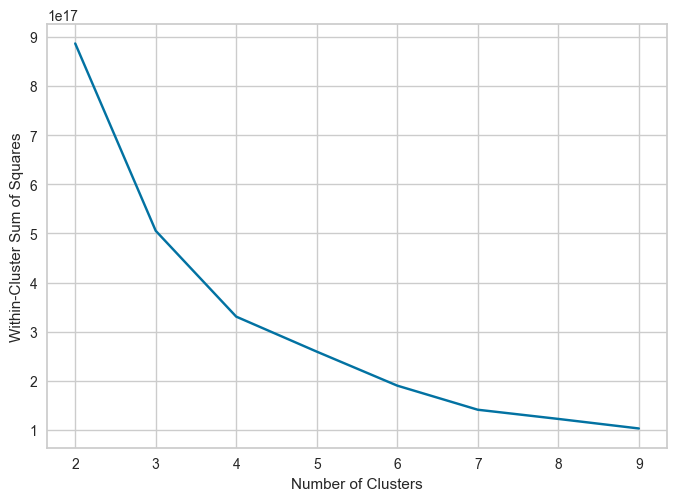

In [39]:
plt.plot(range(2,10),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares');  

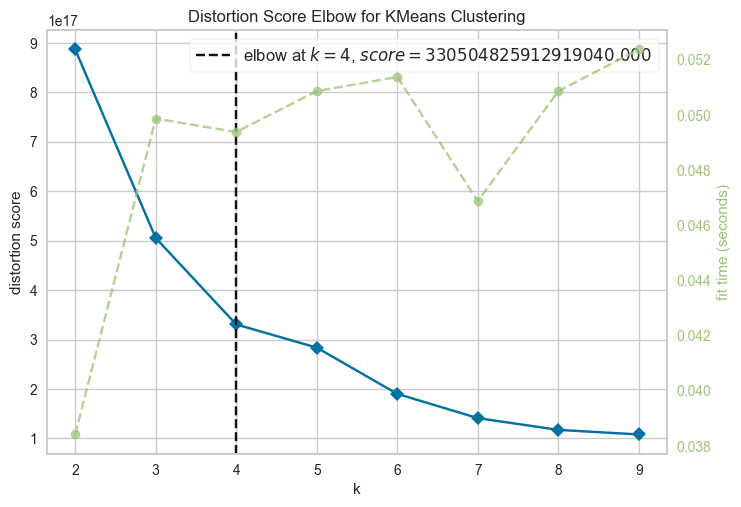

In [40]:
km=KMeans()
vis=KElbowVisualizer(km, k=(2,10))
vis.fit(df2)
vis.show();

In [41]:
#The linkage matrix for hierarchical clustering represents the similarity or distance measurements between data points.
data=linkage(df2,method='ward',metric='euclidean')

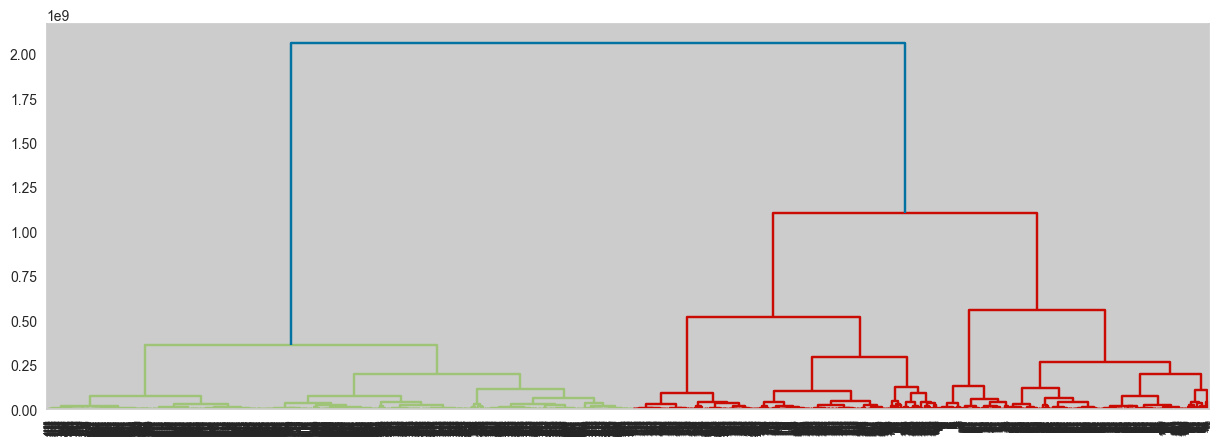

In [42]:
plt.figure(figsize=(15,5))
dendrogram(data);

In [43]:
# Create a sample transaction DataFrame

In [44]:
df2['CustomerID']=df['Customers.id']

In [45]:
df2['Orders.payment_date'] = pd.to_datetime(df2['Orders.payment_date'], unit='s')

In [46]:
df2

,Customers.customer_type,Customers.create_date,Customers.last_modified,Customers.id,Products.list_price,Products.price,Products.cost,Products.status,Orders.payment_date,Orders.payment_amount,Orders.payment_status,Orders.subtotal,Orders.total,Orders.status,cluster,CustomerID
0,0.0,1426018724,1437764306,797,80.70,57.64,44.00,0.0,2015-03-10 20:24:59,64.29,3.0,57.20,64.29,1,1,797
1,0.0,1386089139,1437764354,3,14.41,10.29,1.87,1.0,2013-12-03 17:07:35,29.99,3.0,20.00,29.99,1,2,3
2,0.0,1386089139,1437764354,3,96.29,68.78,52.50,0.0,2015-12-08 19:40:52,78.73,3.0,68.78,78.73,3,1,3
3,0.0,1386780263,1437762646,4,27.38,19.56,12.62,0.0,2013-12-11 16:44:23,29.55,3.0,19.56,29.55,1,2,4
4,0.0,1386861599,1437764316,5,50.47,36.05,25.75,1.0,2013-12-12 15:19:59,46.00,3.0,36.05,46.00,1,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,0.0,1463408698,1463408698,3730,33.11,23.65,15.50,3.0,2016-05-16 14:27:34,16.06,3.0,14.85,16.06,0,0,3730
4190,0.0,1463412756,1463412756,3732,55.19,69.99,28.16,3.0,2016-05-16 15:32:37,39.99,1.0,39.99,39.99,0,0,3732
4191,0.0,1463413245,1463413245,3733,2107.50,1099.00,675.00,3.0,2016-05-16 15:40:46,989.10,1.0,1099.00,989.10,5,0,3733
4192,0.0,1463416687,1463416687,3735,175.81,129.99,91.00,3.0,2016-05-16 16:38:14,129.99,3.0,129.99,129.99,0,0,3735


In [47]:
# Calculate recency, frequency, and monetary values
now=pd.to_datetime('2024-04-01')
recency=now-df2.groupby('CustomerID')['Orders.payment_date'].max()
recency=recency.dt.days
frequency=df2.groupby('CustomerID')['Orders.payment_date'].count() 
monetary=df2.groupby('CustomerID')['Orders.total'].sum()

In [48]:
# Create an RFM DataFrame
rfm_df = pd.DataFrame({
'Recency': recency,
'Frequency': frequency,
'Monetary': monetary
})

# Print the RFM DataFrame
print(rfm_df)

            Recency  Frequency  Monetary
CustomerID                              
3              3036          2    108.72
4              3763          1     29.55
5              3111          3    124.99
7              3747          1     49.14
8              3730          1     69.70
...             ...        ...       ...
3730           2876          1     16.06
3732           2876          1     39.99
3733           2876          1    989.10
3735           2876          1    129.99
3736           2876          1     24.54

[3054 rows x 3 columns]
